## Seattle WA vs. Longview TX Weather Analysis (2018–2022)

**Author:** Badamgarav Battushig  
**Course:** DATA 5100 – Foundation of Data Science  
**Date:** October 08, 2025  

This project compares rainfall in Seattle, WA and Longview, TX between 2018 and 2022 using precipitation data from the National Oceanic and Atmospheric Administration (NOAA). The goal is to determine whether it rains more frequently in Seattle compared to Longview by applying data science techniques such as data cleaning, transformation, and visualization.

## 1. Import Libraries
Import all necessary Python libraries used for data loading, cleaning, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## 2. Load Data
Load the Seattle and Longview precipitation datasets from NOAA.  
Each dataset contains daily weather measurements including precipitation values.

In [113]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/Badamgarv-Battushig/weather/main/data/seattle_rain.csv')

Checking the data type of the df_seattle variable. This will return the type of object that df_seattle is a pandas DataFrame

In [114]:
type(df_seattle)

pandas.core.frame.DataFrame

In [115]:
df_longview = pd.read_csv('https://raw.githubusercontent.com/Badamgarv-Battushig/weather/main/data/longview_rain.csv')

Checking the data type of the df_longview variable. This will return the type of object that df_longview is a pandas DataFrame

In [116]:
type(df_longview)

pandas.core.frame.DataFrame

## 3. Inspect Data 
Before cleaning and analysis, it is important to inspect both datasets to understand their structure and contents.  
This step involves checking the column names, number of rows, and unique weather stations in each dataset to identify potential issues.  
By examining these characteristics, we can detect missing values, confirm that the date and precipitation columns exist, and verify whether the Longview dataset contains multiple stations.  

Display the first 5 rows of the Seattle dataset to examine its structure

In [117]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [118]:
df_longview.head()

,STATION,NAME,DATE,PRCP
0,US1TXHRS019,"HARLETON 4.6 WSW, TX US",5/3/2018,0.0
1,US1TXHRS019,"HARLETON 4.6 WSW, TX US",5/4/2018,0.0
2,US1TXHRS019,"HARLETON 4.6 WSW, TX US",5/5/2018,0.3
3,US1TXHRS019,"HARLETON 4.6 WSW, TX US",5/6/2018,0.0
4,US1TXHRS019,"HARLETON 4.6 WSW, TX US",5/7/2018,0.0


Checks the column names in both datasets to see what variables are included.

In [119]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [120]:
df_longview.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP'], dtype='object')

Displays the number of rows and columns in the Seattle dataset to understand its size.

In [121]:
print(df_seattle.shape)

(1658, 10)


Displays the number of rows and columns in the Longview dataset to understand its size.

In [122]:
print(df_longview.shape)

(19956, 4)


Displays the date column from both datasets to review the recorded dates of the weather observations.

In [123]:
df_longview['DATE']

0         5/3/2018
1         5/4/2018
2         5/5/2018
3         5/6/2018
4         5/7/2018
           ...    
19951    2/22/2018
19952    4/25/2019
19953    9/20/2019
19954    9/21/2019
19955    2/20/2020
Name: DATE, Length: 19956, dtype: object

In [124]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

Finds the latest date recorded in the Longview dataset.

In [125]:
df_longview['DATE'].max()

'9/9/2022'

In [126]:
df_seattle['DATE'].max()

'9/9/22'

Shows all the unique station IDs in the datasets to identify which weather stations the data comes from.

In [127]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [128]:
df_longview['STATION'].unique()

array(['US1TXHRS019', 'US1TXHRS002', 'USW00003901', 'US1TXRS0011',
       'USC00415341', 'US1TXRS0014', 'USW00003951', 'USC00415344',
       'USC00413877', 'USC00412446', 'US1TXGG0007', 'US1TXGG0008',
       'US1TXGG0019', 'US1TXGG0005', 'US1TXUP0011', 'US1TXGG0014',
       'US1TXGG0015'], dtype=object)

Counts how many unique weather stations are included in each dataset to see how many different locations the data was collected from.

In [129]:
df_longview['STATION'].nunique()

17

## 4. Data Cleaning and Preparation
Before analyzing precipitation, the datasets must be cleaned and prepared.  
This process includes identifying multiple weather stations and filtering the data to keep only one, converting date formats, and addressing missing values.

Converts the “DATE” columns in both datasets from text to datetime format to enable accurate time based analysis and comparisons.

In [130]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

C:\Users\badam\AppData\Local\Temp\ipykernel_7064\3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [131]:
df_longview['DATE'] = pd.to_datetime(df_longview['DATE'])

Checks that both datasets cover the same date range to ensure they are comparable for analysis.

In [132]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [133]:
df_longview['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

Creates a Boolean filter that selects rows where the station name is “LONGVIEW E TX REGIONAL AIRPORT, TX US.” The output shows all False values, meaning none of the rows exactly match the given station name. This likely happens because the Longview dataset includes data from multiple weather stations, not just one specific station.

In [134]:
df_longview['NAME'] == 'LONGVIEW E TX REGIONAL AIRPORT, TX US'

0        False
1        False
2        False
3        False
4        False
         ...  
19951    False
19952    False
19953    False
19954    False
19955    False
Name: NAME, Length: 19956, dtype: bool

Filters the Longview dataset to keep only the rows from the station named “LONGVIEW E TX REGIONAL AIRPORT, TX US.”

In [135]:
df_longview = df_longview.loc[df_longview['NAME'] == 'LONGVIEW E TX REGIONAL AIRPORT, TX US']

Shows the unique station IDs in the filtered Longview dataset to confirm that only one station remains after filtering.

In [136]:
df_longview['STATION'].unique()

array(['USW00003901'], dtype=object)

Displays general information about the Longview dataset, including the number of rows and columns, data types of each variable, and the presence of any missing values. This helps confirm the dataset’s structure after filtering.

In [137]:
df_longview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 2688 to 4513
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   PRCP     1825 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 71.3+ KB


Shows the first two rows of the Longview dataset to verify that the data looks correct after filtering.

In [138]:
df_longview.head(2)

,STATION,NAME,DATE,PRCP
2688,USW00003901,"LONGVIEW E TX REGIONAL AIRPORT, TX US",2018-01-01,0.0
2689,USW00003901,"LONGVIEW E TX REGIONAL AIRPORT, TX US",2018-01-02,0.0


Creates a line plot showing how precipitation in Seattle changes over time, helping visualize rainfall trends across the recorded period.

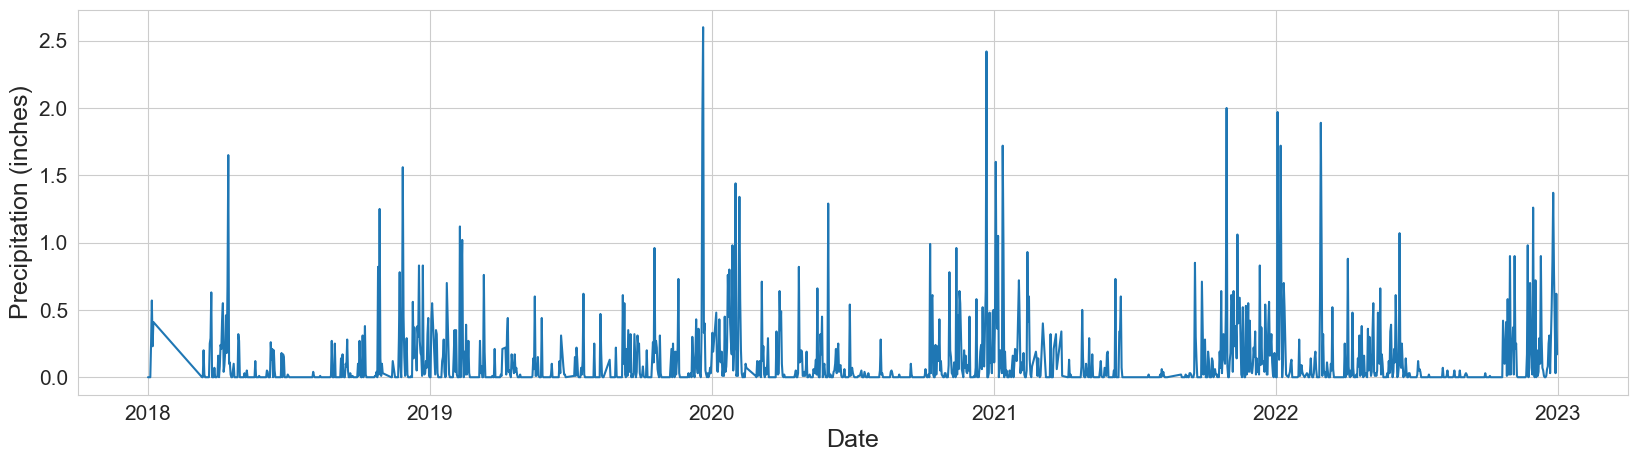

In [139]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

<Axes: xlabel='DATE', ylabel='PRCP'>

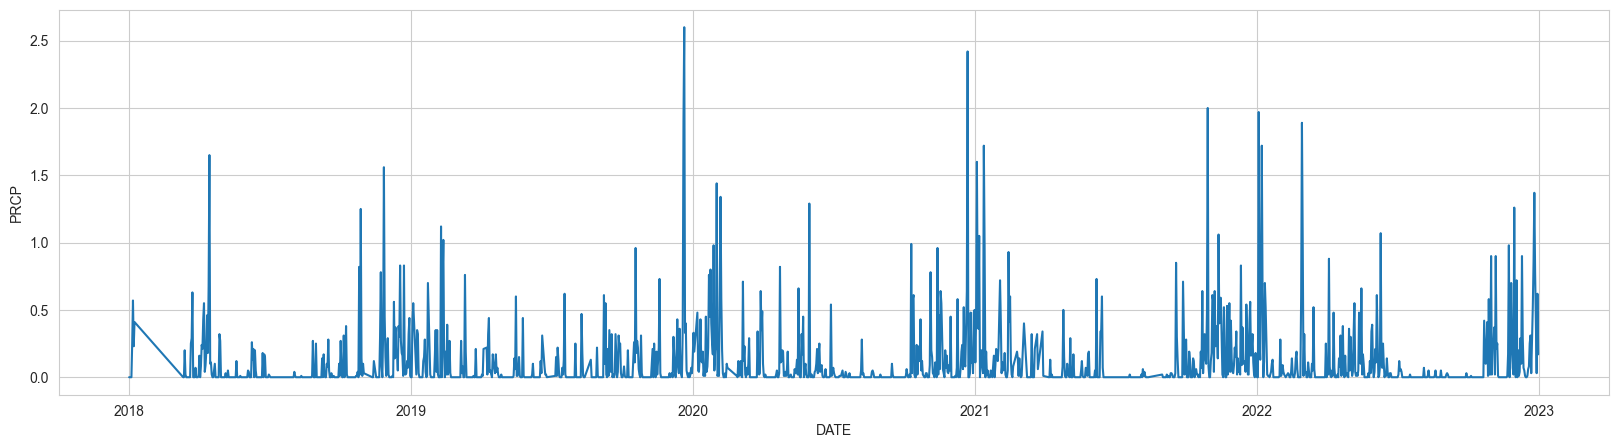

In [140]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

As you can see, there are sudden sharp spikes in precipitation, likely caused by missing or NaN values in the dataset. These gaps make the line jump directly between missing and valid data points. Overall, the graph shows that Seattle experiences frequent fluctuations in rainfall over time, with occasional high peaks indicating heavy rain events.

## 5. Merge and Tidy the Data
The next step is to combine the Seattle and Longview data into a single tidy DataFrame.  
In this section, we combine the `date` and `precipitation` columns from both cities, rename the columns for consistency, and ensure that missing values are properly handled to create a clean dataset for analysis.

Combines the Longview and Seattle datasets into one DataFrame by matching rows with the same dates. The outer join ensures that all dates from both datasets are included, even if one city has missing data for certain days.

In [141]:
df = df_longview[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

Displays the first few rows of the merged dataset to confirm that the Seattle and Longview precipitation data were combined correctly by date.

In [142]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Display how many rows and columns

In [143]:
df.shape

(1826, 3)

Transforms the dataset from wide format to long format, turning the Seattle and Longview precipitation columns into a single “city” column with corresponding “precipitation” values. This makes it easier to plot and analyze the data by city.

In [144]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

Displays the first few rows and the last few rows of the reshaped dataset to verify that the data transformation was successful and that both cities’ precipitation values are correctly aligned by date.

In [145]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


In [146]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62
3651,2022-12-31,PRCP_y,0.17


Renames the city labels in the dataset “PRCP_x” is changed to “LGV” for Longview and “PRCP_y” is changed to “SEA” for Seattle to make the city names clear and consistent.

In [147]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'LGV'

In [148]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

Displays the first and last few rows of the dataset to confirm that the city names were successfully updated to “LGV” and “SEA.”

In [149]:
df.head()

,DATE,city,precipitation
0,2018-01-01,LGV,0.0
1,2018-01-02,LGV,0.0
2,2018-01-03,LGV,0.0
3,2018-01-04,LGV,0.0
4,2018-01-05,LGV,0.0


In [150]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Rename DATE name to date for consistency and easier reference throughout the analysis.

In [151]:
df = df.rename(columns={'DATE': 'date'})

Displays the first rows of the dataset to confirm that the data name were successfully updated. 

In [152]:
df.head()

,date,city,precipitation
0,2018-01-01,LGV,0.0
1,2018-01-02,LGV,0.0
2,2018-01-03,LGV,0.0
3,2018-01-04,LGV,0.0
4,2018-01-05,LGV,0.0


Displays summary information about the dataset, including the number of entries, column names, data types, and any missing values, to verify the dataset’s overall structure before further analysis.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3461 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


Counts the number of non-missing (valid) values in each column to check data completeness for further analysis.


In [154]:
df.notna().sum()

date             3652
city             3652
precipitation    3461
dtype: int64

Counts the number of missing (NaN) precipitation values for both Seattle and Longview.

In [155]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [156]:
df.loc[df['city'] == 'LGV', 'precipitation'].isna().sum()

np.int64(1)

Creates a new column calCreates a new column called “day_of_year” that represents each date as a number from 1 to 365 (or 366 for leap years), making it easier to analyze seasonal or yearly rainfall patterns.
led “day_of_year” that represents each date as a number from 1 to 365 (or 366 for leap years), making it easier to analyze seasonal or yearly rainfall patterns.

In [157]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

Calculates the average daily precipitation for Seattle by grouping the data by each day of the year. This helps identify typical rainfall patterns throughout the year.

In [158]:
mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

Creates a line plot showing Seattle’s average daily precipitation across all years. This visualization highlights how rainfall patterns change throughout the year, revealing wetter and drier seasons.

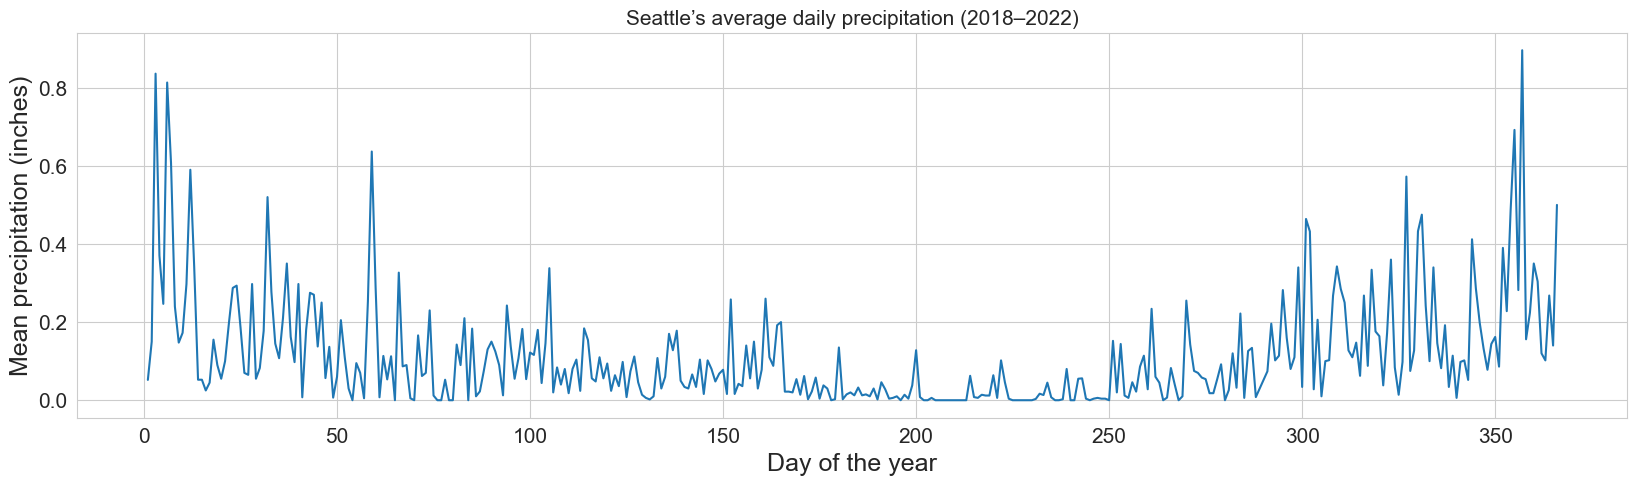

In [159]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)
plt.title('Seattle’s average daily precipitation (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The average daily precipitation for Seattle was calculated by grouping the data by each day of the year and taking the mean. Before plotting, the missing (NaN) precipitation values were replaced with the corresponding daily mean to ensure a complete and accurate trend. The graph shows that Seattle experiences higher rainfall during the winter months and relatively drier conditions in the summer, clearly illustrating its seasonal precipitation pattern.

Finds the index positions of all rows where the precipitation values are missing (`NaN`) in the dataset.

In [160]:
indices = np.where(df['precipitation'].isna() == True)[0]

Displays the list of index positions where precipitation values are missing, helping to locate and inspect those specific rows in the dataset.

Replaces each missing precipitation value in the dataset with the average precipitation for that specific day of the year, ensuring the data remains consistent and complete for analysis.

In [161]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Checks again for any remaining missing (NaN) values in the dataset to confirm that all have been successfully replaced.

In [162]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

Saves the cleaned and processed dataset as a new CSV file named **“clean_seattle_longview_weather.csv”** with UTF-8 encoding, excluding the index column. This creates a ready-to-use version of the dataset for further analysis or sharing.

In [163]:
df.to_csv('clean_seattle_longview_weather.csv', encoding='utf-8-sig', index=False)

## 6. Analysis and Visualization
Now that the datasets are cleaned and consistent, we can begin the exploratory data analysis (EDA).  
In this section, we analyze and visualize precipitation patterns to compare rainfall frequency, seasonal trends, and average precipitation between Seattle, WA and Longview, TX.

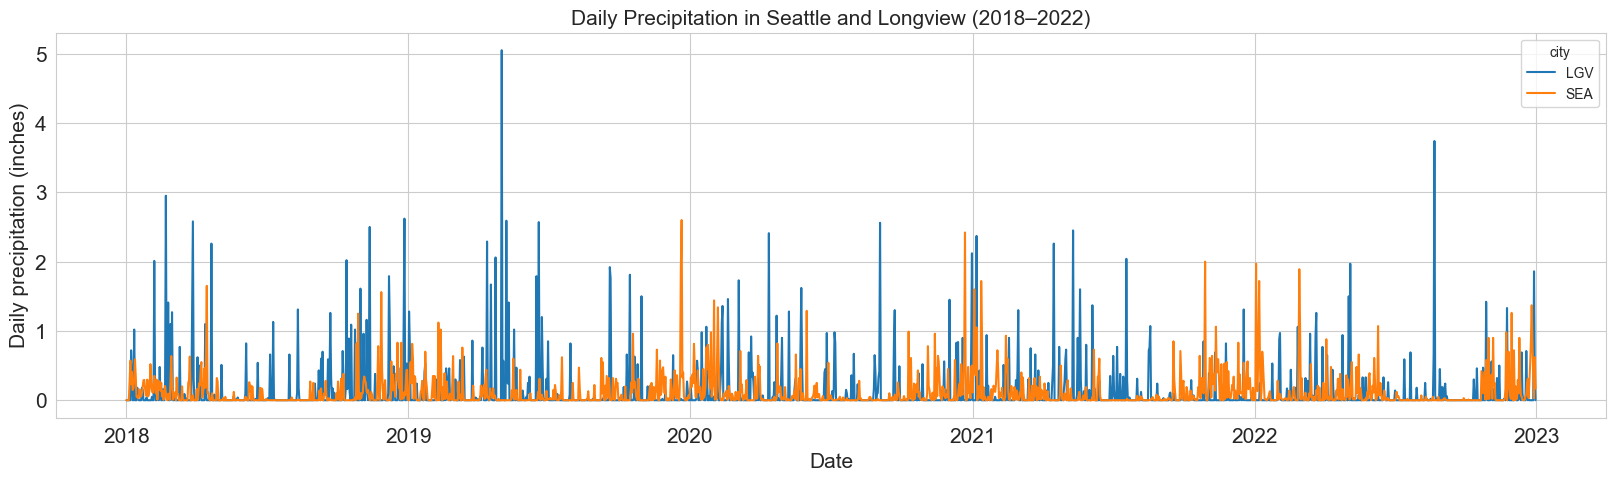

In [164]:
#Plotted daily precipitation from 2018 to 2022 for both cities to compare rainfall patterns over time.

plt.figure(figsize=(20,5))

sns.lineplot (data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)
plt.title('Daily Precipitation in Seattle and Longview (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15)
plt.show()

The line plot shows that both have regular rainfall between 2018 and 2023. The results show that rainfall changes a lot from day to day, with some extreme peaks during certain years. SEA had smaller but frequent rain events.

##### Below calculated summary statistics for precipitation in each city to compare overall rainfall levels.

In [165]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
LGV         1826.0  0.127084  0.382377  0.0  0.0  0.00  0.02  5.05
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

The calculated summary shows both have same number of 1826 days. Longview (LGV) had a slightly higher average daily precipitaion 0.127 inches compared to Seattle (SEA) 0.114 inches. On the other hand, SEA had higher typical rainfall on wetter days percentile 0.123. Longview experienced more exreme rainfall events, with a maximum of about 5inches, while Seattle's maximum was about 2.6 inches.

##### Below is a calculation of the average daily precipitation for each city to see which one receives more rainfall.

In [166]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
LGV,0.127084
SEA,0.113270


The results show that LGV has a slightly higher average daily precipitation 0.127 inches compared to SEA 0.114 inches. This means that, on average, LGV receives a little more rainfall each day than SEA, although the difference is small.

##### Created a bar plot to compare the average daily precipitation between the two cities.

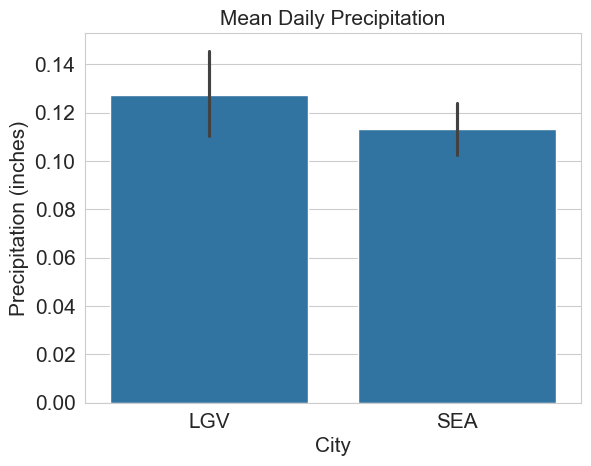

In [167]:
sns.barplot (data=df, x='city', y='precipitation')

plt.xlabel('City', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.show()

LGV receives a little more daily rain on average than SEA, but the difference is small.

##### Used help command to look the documentation for sns.barplot. 

In [168]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 

The documentation shows that sns.barplot creates a bar plot with the mean value for each category and, by default, includes 95% confidence interval error bars.If the lines are small, the average is more reliable because the data is consistent. If the lines are big, there is more variation in the data, and the true average could be anywhere in that wider range.

##### Created a new column called month by extracting the month from the date values. This will make it easier to analyze rainfall patterns by month.

In [169]:
df['month'] = pd.DatetimeIndex(df['date']).month

Displayed the first five rows of the dataset to check the structure of the data and confirm that the new month column was added correctly.

In [170]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,LGV,0.0,1,1
1,2018-01-02,LGV,0.0,2,1
2,2018-01-03,LGV,0.0,3,1
3,2018-01-04,LGV,0.0,4,1
4,2018-01-05,LGV,0.0,5,1


The output shows the dataset with columns for city, date, precipitation, and the new month column.

##### Checked the unique values in the month column to confirm that it correctly represents all 12 months of the year.

In [171]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

The output lists the month numbers included in the dataset.

##### Seaborn’s barplot is used to show the average precipitation for each month. 

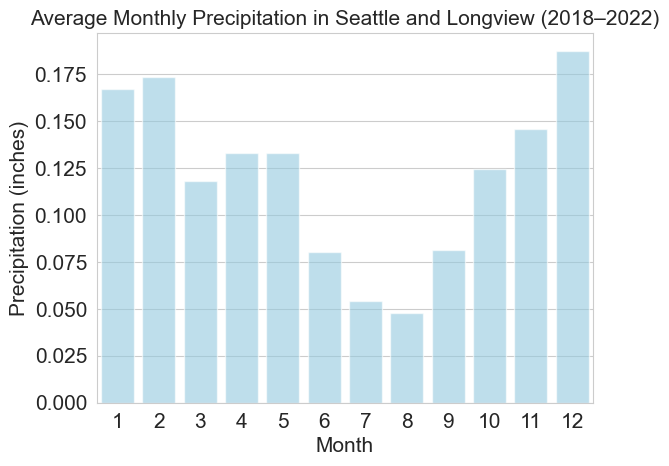

In [172]:
sns.barplot(data=df, x='month', y='precipitation', alpha=0.6, color="skyblue", errorbar=None)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Average Monthly Precipitation in Seattle and Longview (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15);

The chart now shows only the average precipitation per month **without error bars**. This makes the plot cleaner and easier to read. However, it no longer shows variability or uncertainty in the data. 

##### Created boxplots of precipitation amounts for each month from 2018–2022, separated by city. This helps show the distribution of rainfall, including medians, variation, and extreme rainfall events across the months.

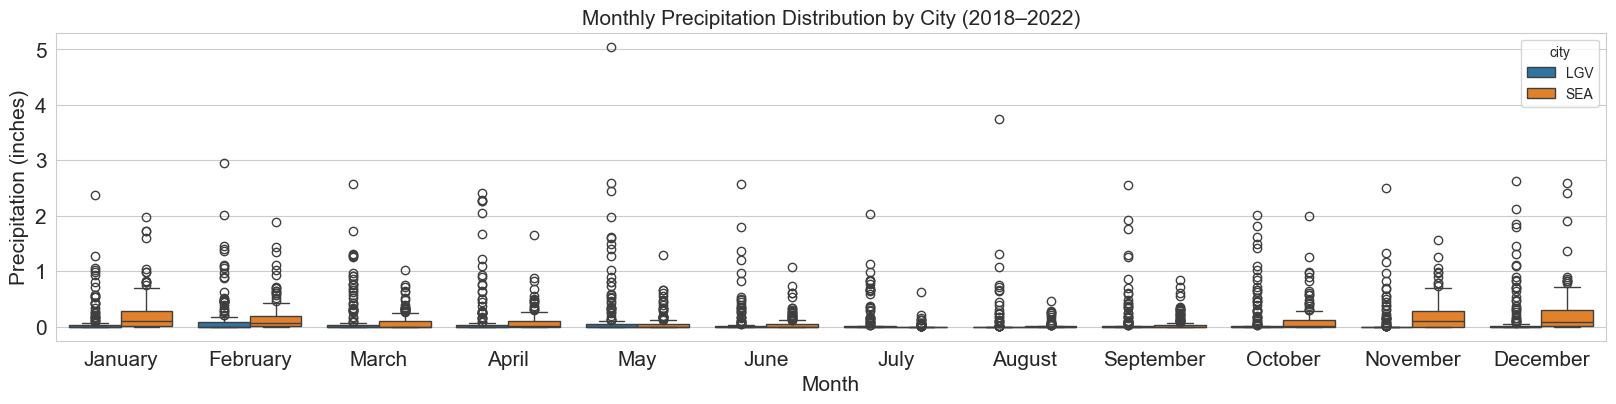

In [173]:
#Plot the distribution of precipitation amounts each month using boxplots
plt.figure(figsize=(20, 4))

sns.boxplot (data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Monthly Precipitation Distribution by City (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15)

#Get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) #Get month names
plt.xticks(ticks=range(12), labels=month_names) #Set x-axis ticks to month names
plt.show()

The boxplot demonstrates seasonal rainfall patterns. Rainfall is higher in the winter months and lower in the summer. However, LGV has more extreme outliers, which shows occasional heavy rainfall compared to SEA. 

##### Created horizontal boxplots to show precipitation amounts for each month, separated by city. This layout makes it easier to compare rainfall distributions across months side by side.

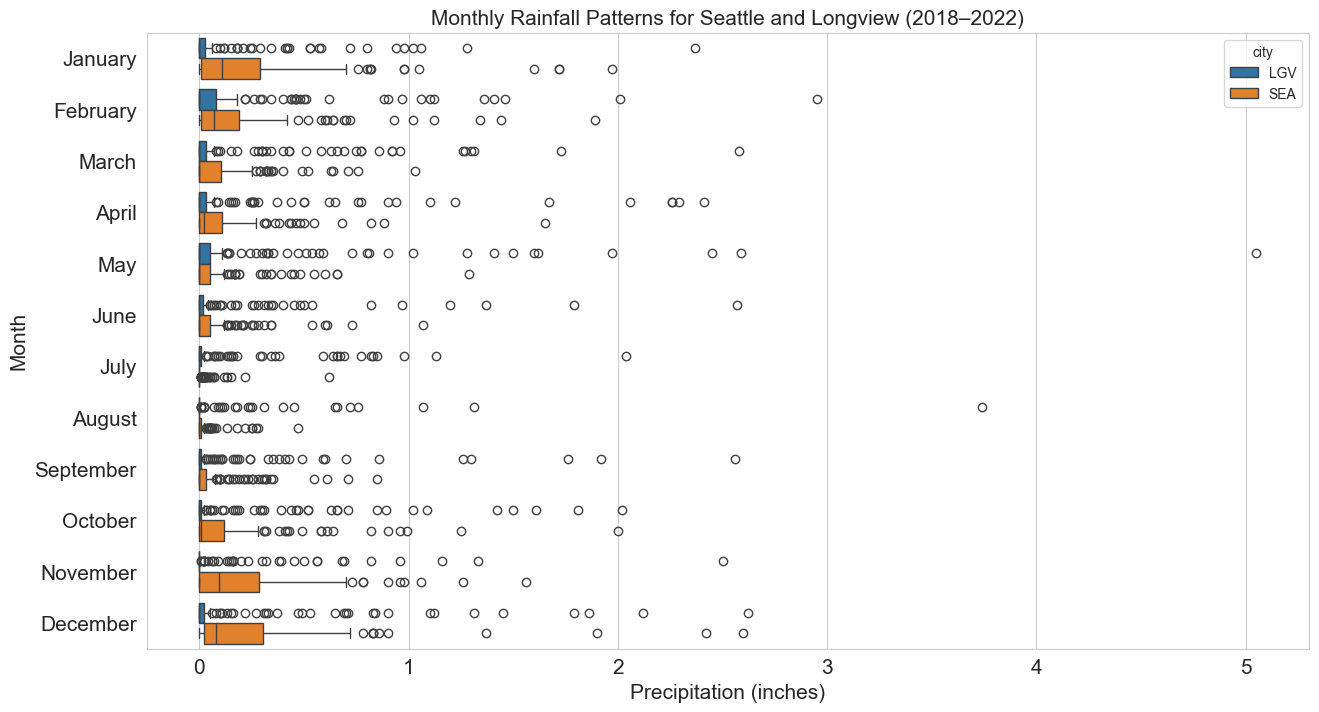

In [174]:
plt.figure(figsize=(15, 8))

sns.boxplot (data=df, x='precipitation', y='month', hue='city', orient='h')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Month', fontsize=15)
plt.title('Monthly Rainfall Patterns for Seattle and Longview (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

This plot shows the same result as the previous boxplot, but it is much easier to compare rainfall across months side by side.

##### Plotted the monthly boxplots again, but this time I zoomed in on the precipitation axis (0–0.4 inches). This makes it easier to compare the typical rainfall amounts without the scale being dominated by extreme outliers.

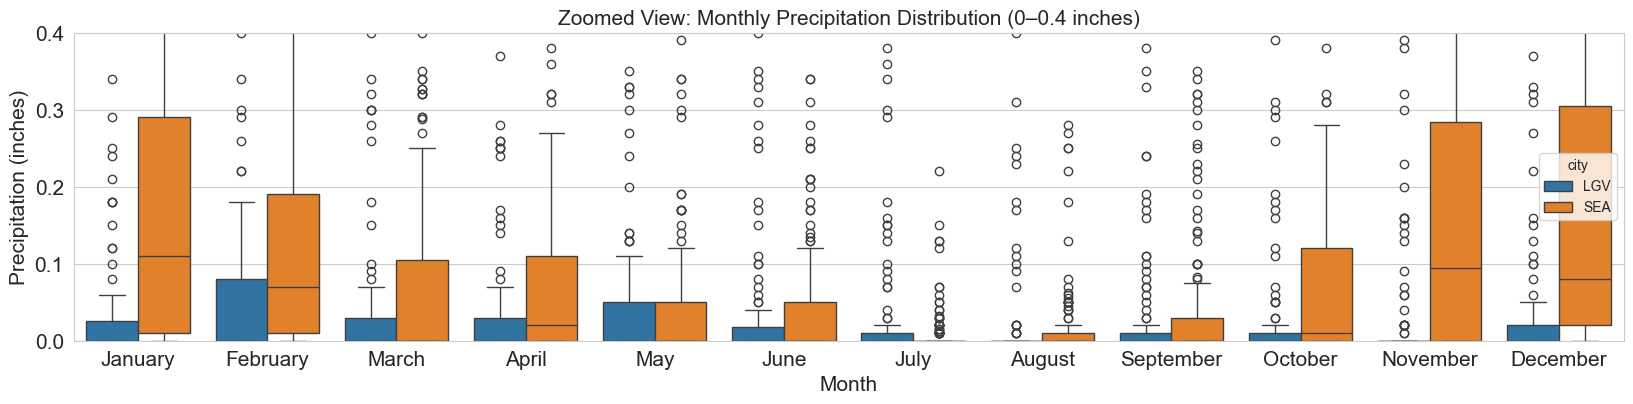

In [175]:
#Zoom in on the precipitation axis
plt.figure(figsize=(20, 4))

sns.boxplot (data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Zoomed View: Monthly Precipitation Distribution (0–0.4 inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)
    
plt.show()

The zoomed-in boxplot makes the monthly rainfall patterns much easier to see. It shows that precipitation is highest in the winter months specifically December, January, and February and lowest in the summer months June through August. SEA shows consistently higher rainfall amounts compared to LGV across most months.

##### Created a bar plot to show the average precipitation in each month for both cities. This helps compare seasonal rainfall patterns across the year.

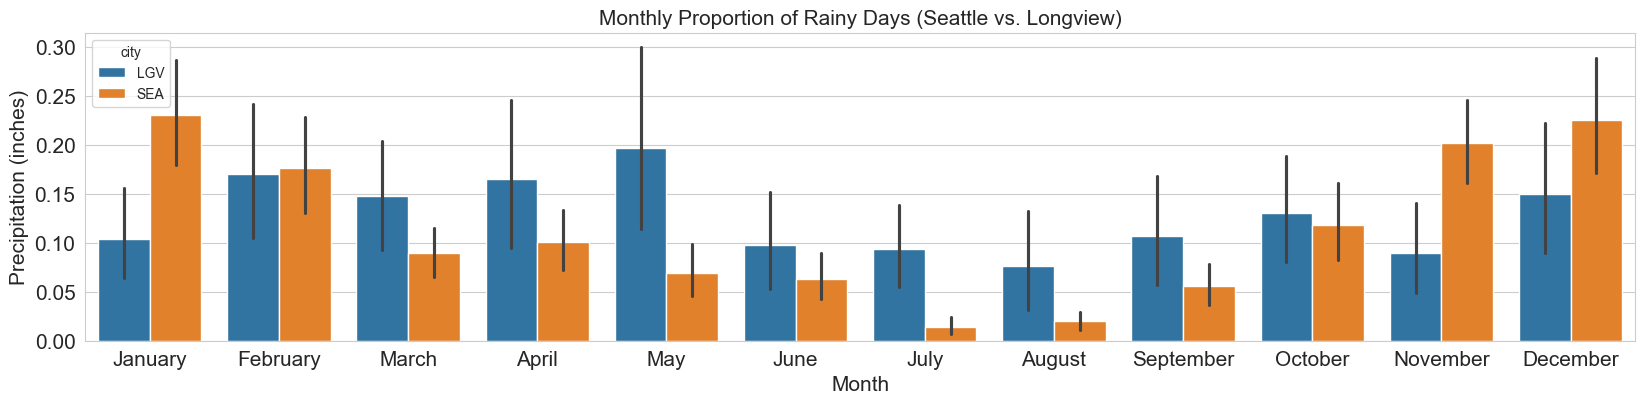

In [176]:
#Plot the mean precipitation each month
plt.figure(figsize=(20, 4))

sns.barplot (data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Monthly Proportion of Rainy Days (Seattle vs. Longview)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)
    
plt.show()

The bar plot shows clear seasonal rainfall patterns for both cities. The error bars show variation in rainfall but overall seasonal trends are consistent.

##### Calculated the mean precipitation for each month by city to see the seasonal rainfall averages.

In [177]:
#Compute the mean precipitation each month
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
LGV  1           0.103548
     2           0.170284
     3           0.147548
     4           0.165200
     5           0.197071
     6           0.097267
     7           0.094000
     8           0.075806
     9           0.106933
     10          0.130323
     11          0.089267
     12          0.150065
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

The table shows the mean precipitation by month for both cities. SEA has the highest averages in winter months like December and January, while rainfall drops sharply in summer, especially in July. LGV has a higher average than SEA specifically in the spring months.

##### Created a new column called any_precipitation to indicate whether a day had rainfall.

In [178]:
#Plot the proportion of days with any precipitation 
df['any_precipitation'] = df['precipitation'] > 0

In [179]:
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,LGV,0.0,1,1,False
1,2018-01-02,LGV,0.0,2,1,False
2,2018-01-03,LGV,0.0,3,1,False
3,2018-01-04,LGV,0.0,4,1,False
4,2018-01-05,LGV,0.0,5,1,False


The new column any_precipitation correctly marks days with rainfall as True and dry days as False.

##### Plotted the proportion of days with any precipitation from 2018 to 2022 for each city.

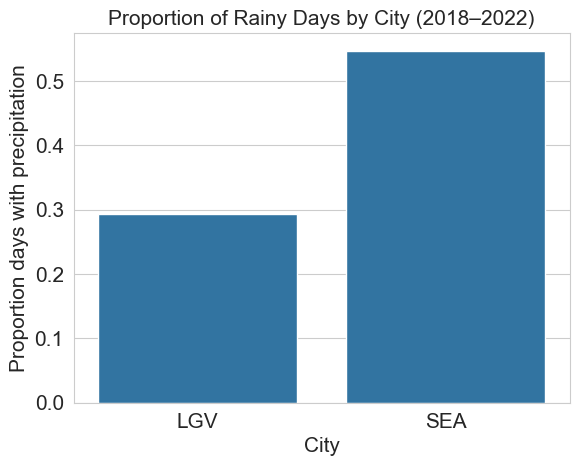

In [180]:
#Plot the proportion of days with any precipitation over the 5 years
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15)
plt.title('Proportion of Rainy Days by City (2018–2022)', fontsize=15)

plt.tick_params(labelsize=15)
    
plt.show()

The bar plot shows SEA experienced precipitation on more than half of the days, while LGV had rain on less than one-third of the days. Therefore, SEA had rainy weather much more frequently, even though LGV sometimes has heavier rainfall.

##### Plotted the proportion of days with precipitation in each month. This helps compare how often it rains during different seasons.

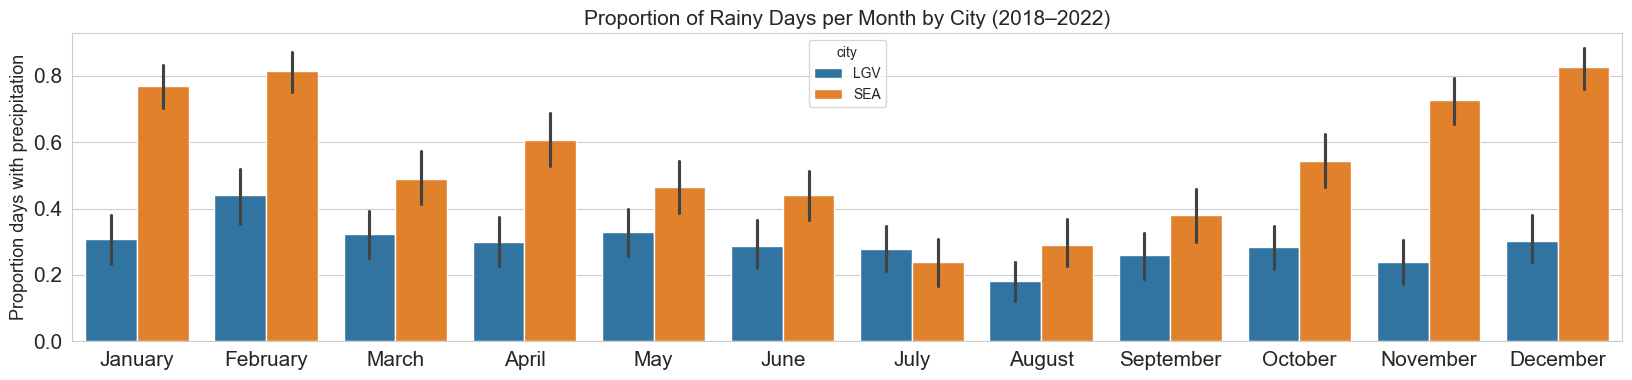

In [181]:
#Plot the proportion of each days with precipitation each month
plt.figure(figsize=(20, 4))

sns.barplot (data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.title('Proportion of Rainy Days per Month by City (2018–2022)', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.tick_params(labelsize=15)
    
plt.show()

SEA has more rainy days than LGV across all months, with the most rain in winter and the least in summer.

##### Created a histogram to show the distribution of daily precipitation in January, separated by city. This illustrates how rainfall amounts vary during that month.

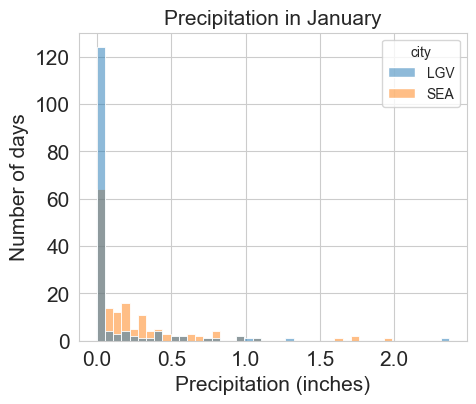

In [182]:
#Using a histogram to show January, but it is skewed
plt.figure(figsize=(5, 4))

sns.histplot (data=df.loc[df['month'] == 1], x='precipitation', hue='city')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)
    
plt.show()

The histogram shows that most January days in both LGV and SEA had no or very little precipitation. Only a small number of days had higher rainfall amounts, which creates a right-skewed distribution. Thus, the majority of days are dry or light rain, while a few days account for the heavier rainfall events.

##### Performed a two-sample t-test for each month to check whether the average daily precipitation in SEA and LGV is significantly different. A significance level of 0.05 was used, meaning results with a p-value less than 0.05 are considered statistically significant.

In [183]:
from scipy import stats

In [184]:
from scipy import stats
significance_level = 0.05
significantly_different = np.zeros(12)

#Perform t-test for each month
for month in range (1, 13):
    #Get precipitation data for Seattle and Longview for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    lgv_data = df.loc[(df['city'] == 'LGV') & (df['month'] == month), 'precipitation']
    
    t_statistic, p_value = stats.ttest_ind(sea_data, lgv_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

        print(f"Month {month}:")
        print(f" t-statistic = {t_statistic:.2f}")
        print(f" p-value t test = {p_value:.3f}")
        print("-" *20)

Month 1:
 t-statistic = 3.52
 p-value t test = 0.001
--------------------
Month 5:
 t-statistic = -2.61
 p-value t test = 0.010
--------------------
Month 7:
 t-statistic = -3.64
 p-value t test = 0.000
--------------------
Month 11:
 t-statistic = 3.44
 p-value t test = 0.001
--------------------


T-test results show precipitation in SEA and LGV was significantly different in Jan, May, July, and Nov. Since these p-values are below the significance threshold of 0.05, we can see that rainfall patterns in these months were meaningfully different between the two cities. For the other months, the differences in precipitation were not statistically significant, meaning they could be due to random variation.

##### Created a bar plot of mean monthly precipitation for both cities and added stars above the months where rainfall differences were statistically significant

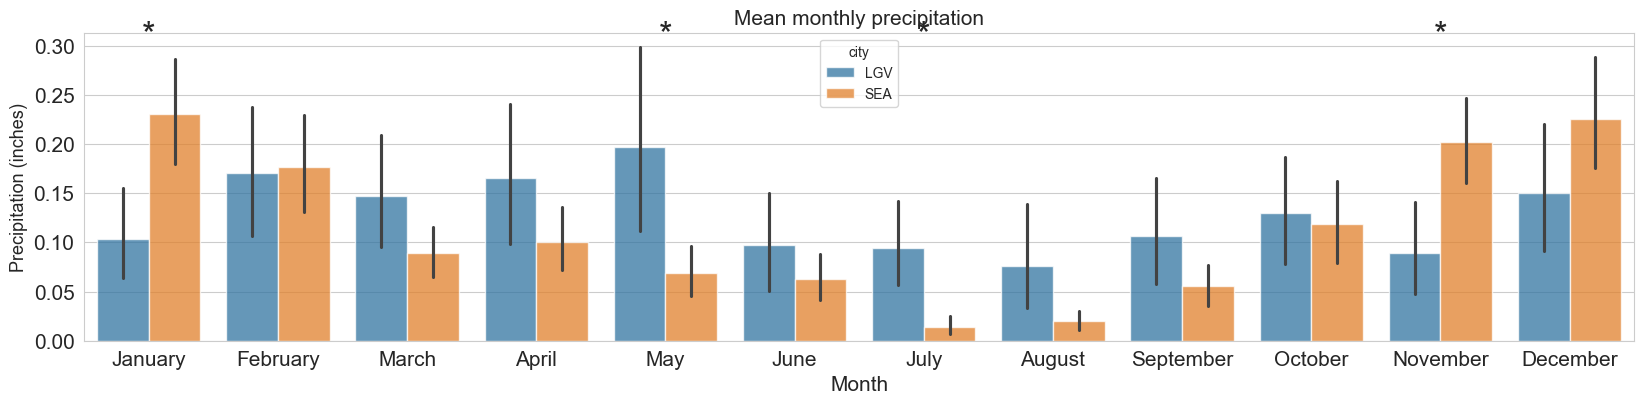

In [185]:
plt.figure(figsize=(20, 4))

sns.barplot (data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=13)
plt.title('Mean monthly precipitation', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.tick_params(labelsize=15)

#Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:

        #Add a star
        plt.text(month, 0.3, '*', ha='center', fontsize=25)
    
plt.show()

The bar plot shows Jan, May, July and Nov months show meaningful differences while other months do not. However, both cities follow a similar seasonal cycle, rainfall levels being significantly different during certain times of the year.

##### Used a two-proportion z-test to compare the proportion of rainy days (days with precipitation > 0) between SEA and LGV for each month. A significance level of 0.05 was used, so if the p-value is below 0.05, the difference in proportions is statistically significant.

In [186]:
from statsmodels.stats.proportion import proportions_ztest
significance_level = 0.05
significantly_different_proportion = np.zeros(12)

#Perform t-test for each month
for month in range(1, 13):
    #Create a contingency table for Seattle and Longview for the current month:
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation'])

    #Calculate the number of true values (days with precipitaion) for each city
    days_with_precipitation = contingency_table[True]

    #Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis=1)

    #Hypothesis test
    zstat, p_value = proportions_ztest(
            count=days_with_precipitation, nobs=total_counts, alternative='two-sided')

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f"Month {month}:")
    print(f" z-statistic = {zstat:.2f}")
    print(f" p-value = {p_value:.3f}")
    print("-" *20)

Month 1:
 z-statistic = -8.09
 p-value = 0.000
--------------------
Month 2:
 z-statistic = -6.53
 p-value = 0.000
--------------------
Month 3:
 z-statistic = -3.01
 p-value = 0.003
--------------------
Month 4:
 z-statistic = -5.33
 p-value = 0.000
--------------------
Month 5:
 z-statistic = -2.44
 p-value = 0.015
--------------------
Month 6:
 z-statistic = -2.76
 p-value = 0.006
--------------------
Month 7:
 z-statistic = 0.78
 p-value = 0.436
--------------------
Month 8:
 z-statistic = -2.28
 p-value = 0.023
--------------------
Month 9:
 z-statistic = -2.23
 p-value = 0.026
--------------------
Month 10:
 z-statistic = -4.61
 p-value = 0.000
--------------------
Month 11:
 z-statistic = -8.43
 p-value = 0.000
--------------------
Month 12:
 z-statistic = -9.28
 p-value = 0.000
--------------------


The z-test results show that for nearly every month, the proportion of rainy days between SEA and LGV is significantly different (p < 0.05). SEA generally experiences rain on a higher proportion of days across the year compared to LGV, except in midsummer when both cities are relatively dry.

##### The contingency table for January shows the number of dry days (False) and rainy days (True) for each city.

In [187]:
contingency_table = pd.crosstab(
    df.loc[df['month'] == 1, 'city'], df.loc[df['month'] ==1, 'any_precipitation'])
contingency_table

any_precipitation,False,True
city,,
LGV,107,48
SEA,36,119


The contingency table shows that in January, LGV had 48 rainy days 31% of the month while SEA had 113 rainy days 73% of the month.

##### Created a bar plot showing the monthly proportion of rainy days for SEA and LGV from 2018 to 2022. Stars mark the months where the difference between the two cities is statistically significant, based on the two-proportion z-test.

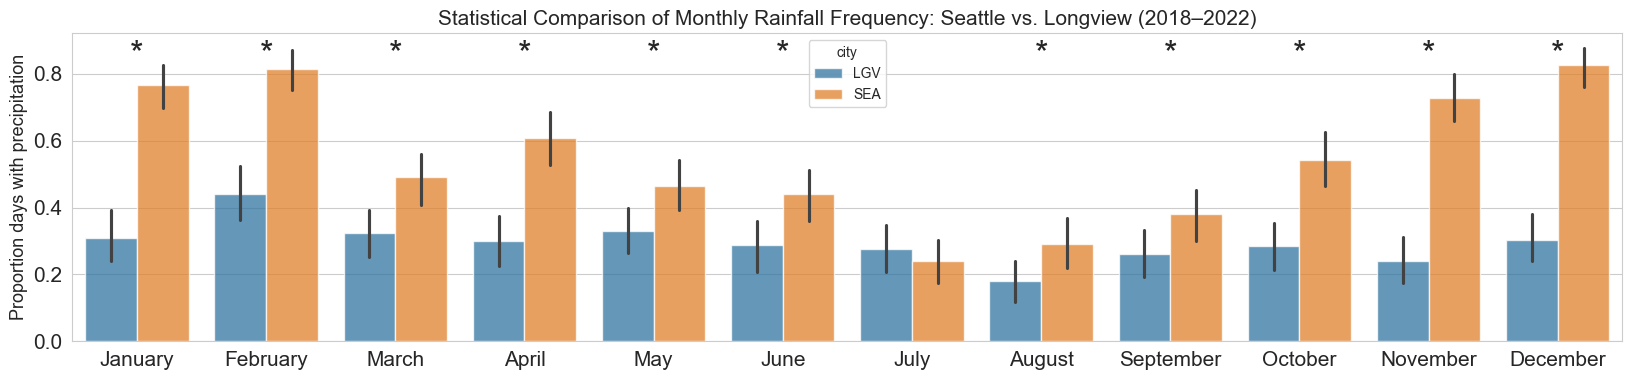

In [188]:
plt.figure(figsize=(20, 4))

sns.barplot (data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.title('Statistical Comparison of Monthly Rainfall Frequency: Seattle vs. Longview (2018–2022)', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.tick_params(labelsize=15)

#Add stars for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:

        #Add a star
        plt.text(month, 0.825, '*', ha='center', fontsize=25)
    
plt.show()

The bar plot shows the monthly proportion of days with rainfall for SEA and LGV from 2018 to 2022. SEA consistently has more rainy days than LGV throughout the year. Stars mark months where the difference between the two cities is statistically significant, which occurs in every month except July.

## 8. Conclusion
This project compared precipitation patterns between Seattle, WA and Longview, TX from 2018 to 2022 using NOAA daily weather data. After cleaning, merging, and analyzing the data, the results showed that Seattle experiences rainfall more frequently and consistently throughout the year, particularly during the winter months. In contrast, Longview has fewer rainy days overall, but tends to experience sudden rainfall events more often in spring.  

## 9. Ethical Considerations and Reproducibility
This work used public weather data, which does not contain personally identifiable information, so privacy concerns are minimal. The analysis focused on descriptive statistics and visualizations, which were designed to honestly represent the underlying data without exaggeration. While dataset bias is unlikely in this case since the data comes from standard weather records, limitations include only comparing two cities and not accounting for larger climate factors. The analysis is reproducible, as all steps are documented in this notebook.